In [27]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#Load CSV file
df = pd.read_csv('dodgers.csv')

In [29]:
#See top rows in df
df.head

<bound method NDFrame.head of    month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0    APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1    APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2    APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3    APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4    APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
..   ...  ...     ...         ...      ...   ...     ...       ...  ..   ...   
76   SEP   29   40724    Saturday  Rockies    84  Cloudy     Night  NO    NO   
77   SEP   30   35607      Sunday  Rockies    95  Clear        Day  NO    NO   
78   OCT    1   33624      Monday   Giants    86  Clear      Night  NO    NO   
79   OCT    2   42473     Tuesday   Giants    83  Clear      Night  NO    NO   
80   OCT    3   34014   Wednesday   Giants    82  Cloudy     Night  NO    NO   

   firewo

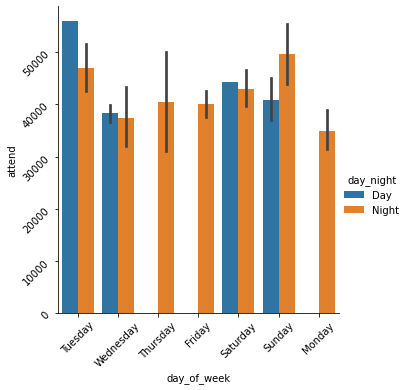

In [34]:
#Bar plot of day/night games based on days of the week.
b = sns.factorplot(x ='day_of_week', y ='attend', 
               kind = 'bar', hue = 'day_night', 
               data = df)
for ax in b.axes.flatten():
    ax.tick_params(rotation = 45)

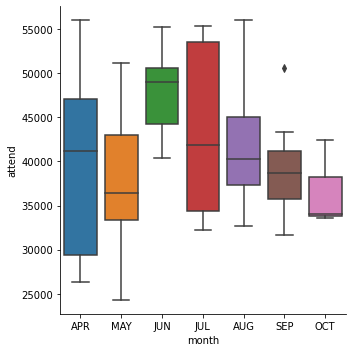

In [8]:
# Box plot of months vs. attendance
sns.factorplot(x ='month', y ='attend',
               kind = 'box', data = df)

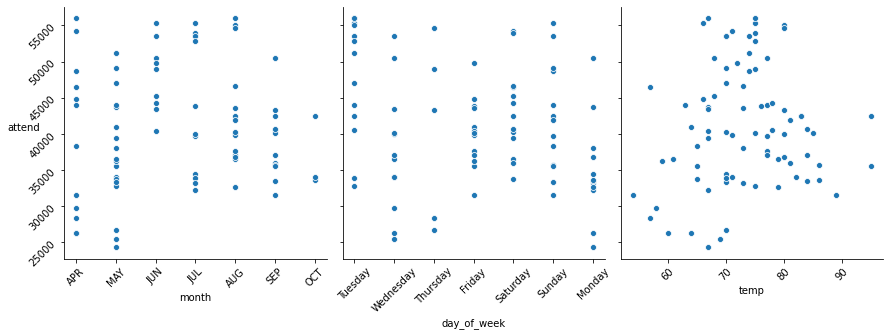

In [32]:
# Pairplot of Month, Days. Temp, vs. Attendance
g = sns.pairplot(df, x_vars=['month', 'day_of_week','temp'], 
             y_vars='attend', size=4, aspect=1, kind='scatter')
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)

In [24]:
# average temps and attendance by month
x = {'temp':'avg_temp', 'attend':'avg_attend'}
temp_df = df.groupby('month').agg({'temp':'mean', 'attend':'mean'}).rename(columns=x).sort_values('avg_temp')
temp_df

,avg_temp,avg_attend
month,,
APR,63.000000,39591.916667
MAY,68.555556,37345.722222
JUN,70.555556,47940.444444
JUL,73.166667,43884.250000
AUG,77.333333,42751.533333
OCT,83.666667,36703.666667
SEP,84.250000,38955.083333


In [25]:
# See which promotion leads to the most attendance (hats, shirts, fireworks, bobbleheads)
df.groupby(['cap','shirt','bobblehead','fireworks']).attend.describe()

count          mean          std      min  \
cap shirt bobblehead fireworks                                              
NO  NO    NO         NO          51.0  38201.078431  7437.222312  24312.0   
                     YES         14.0  41077.857143  5768.351782  31601.0   
          YES        NO          11.0  53144.636364  2887.153279  47077.0   
    YES   NO         NO           3.0  46643.666667  5295.079351  40619.0   
YES NO    NO         NO           2.0  38189.500000  6088.896493  33884.0   

                                     25%      50%       75%      max  
cap shirt bobblehead fireworks                                        
NO  NO    NO         NO         33423.00  37084.0  43401.50  56000.0  
                     YES        37255.25  40299.5  43789.00  53570.0  
          YES        NO         51984.50  54242.0  55151.50  56000.0  
    YES   NO         NO         44686.00  48753.0  49656.00  50559.0  
YES NO    NO         NO         36036.75  38189.5  40342.25  42495.0

In [26]:
#See which days bobblehead promotions were on and how much they increased attendance.
df.groupby(['day_of_week','bobblehead']).attend.describe()

count          mean          std      min       25%  \
day_of_week bobblehead                                                        
Friday      NO           13.0  40116.923077  4694.879400  31601.0  37133.00   
Monday      NO           12.0  34965.666667  7005.957949  24312.0  32553.75   
Saturday    NO           11.0  41062.909091  4392.208248  33735.0  37972.00   
            YES           2.0  54128.000000   161.220346  54014.0  54071.00   
Sunday      NO           12.0  41178.000000  6787.843733  31607.0  35717.25   
            YES           1.0  55359.000000          NaN  55359.0  55359.00   
Thursday    NO            3.0  32803.333333  9131.335079  26773.0  27550.50   
            YES           2.0  51813.500000  3970.404576  49006.0  50409.75   
Tuesday     NO            7.0  43326.714286  8875.037572  32799.0  37251.50   
            YES           6.0  52891.500000  3370.480841  47077.0  51560.75   
Wednesday   NO           12.0  37585.166667  8696.234889  25509.0  32927.00   

                            50%       75%      max  
day_of_week bobblehead                              
Friday      NO          40167.0  43537.00  49763.0  
Monday      NO          33582.0  37162.50  50559.0  
Saturday    NO          40724.0  44713.50  46588.0  
            YES         54128.0  54185.00  54242.0  
Sunday      NO          40811.0  45192.00  53504.0  
            YES         55359.0  55359.00  55359.0  
Thursday    NO          28328.0  35818.50  43309.0  
            YES         51813.5  53217.25  54621.0  
Tuesday     NO          42473.0  48756.00  56000.0  
            YES         53928.0  55215.25  56000.0  
Wednesday   NO          36840.0  41003.25  53570.0